In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

In [2]:
df= pd .read_csv('Airbnb_Open_Data.csv')
df.head(10)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_63280/154860406.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd .read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,US,False,strict,Private room,2015.0,$291,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


# TODO LIST:

#Working with data inconsistancy

## DATA CLEANING based on:
#Missing values
#Look at data types and chagnge if necessary.
#Remove Duplicate data
#Drop unwanted column
#Find out the outliers and remove them.
# EDA Analysis.

In [3]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [4]:
# Remove inconsitency in column name:

df = df.replace(" ","",regex=True)
df.columns = df.columns.str.replace(' ', '_')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Data Cleaning


In [6]:
# Find out duplicate values in the Dataset

df.duplicated().sum()

541

In [7]:
#first we need to drop the duplicate rows to make the analysis more precise:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Drop unwanted columns for analysis

In [8]:
df.drop(["NAME","license","country","country_code"],axis=1,inplace=True)



#All the data from the same country so we can remove 'country','country code'. 'NAME' & 'license' column do not have any importance in our analysis. So I removed them all.

In [9]:
df.head(3)

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Privateroom,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Cleanupandtreatthehomethewayyou'dlikeyourhomet...
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entirehome/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Petfriendlybutpleaseconfirmwithmeifthepetyouar...
2,1002403,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Privateroom,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"Iencourageyoutousemykitchen,cookingandlaundryf..."


In [10]:
#Find out missing values in the dataset
df.isnull().sum()


id                                    0
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room_type                             0
Construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
house_rules                       51842
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   host_id                         102058 non-null  int64  
 2   host_identity_verified          101769 non-null  object 
 3   host_name                       101654 non-null  object 
 4   neighbourhood_group             102029 non-null  object 
 5   neighbourhood                   102042 non-null  object 
 6   lat                             102050 non-null  float64
 7   long                            102050 non-null  float64
 8   instant_bookable                101953 non-null  object 
 9   cancellation_policy             101982 non-null  object 
 10  room_type                       102058 non-null  object 
 11  Construction_year               101844 non-null  float64
 12  price           

In [12]:
#convert last review into datetime column:

df["last_review"] = pd.to_datetime(df['last_review'], format="%m/%d/%Y", errors="raise")


In [13]:
# Working on 'review per month' null values:

df['review_rate_number'].isna().sum()

319

In [14]:
df['review_rate_number'].fillna(df['review_rate_number'].mean(),inplace=True)

In [15]:
df['review_rate_number']
df['review_rate_number'].isna().sum()

0

In [16]:
# Working on 'availability 365' null values:
df['availability_365'].isna().sum()

#Availability values null means it was not available for whole year. so i will fill the null with 0.


448

In [17]:
df['availability_365'].fillna(0,inplace=True)
df['availability_365'].isna().sum()

0

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

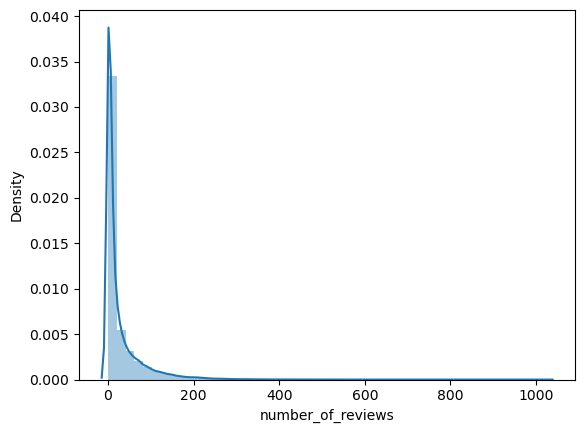

In [18]:
sns.distplot(df['number_of_reviews'])

In [19]:
#Number of the reviews is most of the time 0

In [20]:
#working with null values in 'number of reviews' column
df[df['number_of_reviews'].isna()]

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
97,1054909,8644470108,verified,Sydney,Manhattan,UpperWestSide,40.79764,-73.96177,True,strict,Entirehome/apt,2017.0,$343,$69,NaN,NaN,2019-07-07,0.71,3.278733,1.0,55.0,Weaskthatguestsberespectfulandconsiderateofthe...
141,1079210,63891709973,verified,Martin,Brooklyn,Greenpoint,40.73409,-73.95348,False,moderate,Entirehome/apt,2016.0,$488,$98,NaN,NaN,NaT,0.03,4.000000,1.0,325.0,NaN
566,1313938,77437300795,unconfirmed,Alisa,Manhattan,EastVillage,40.72956,-73.97903,False,strict,Entirehome/apt,2007.0,$844,$169,1.0,NaN,2019-07-01,0.65,3.000000,1.0,85.0,NaN
1066,1590088,16471166561,verified,Sharma,Queens,JacksonHeights,40.74906,-73.89377,True,flexible,Privateroom,NaN,$399,$80,7.0,NaN,2018-09-30,0.64,5.000000,3.0,126.0,HouseRulesThehouserulesareanimportantpartofsta...
1591,1880045,5336294653,verified,Ellen,Manhattan,UpperWestSide,40.79241,-73.97111,False,strict,Entirehome/apt,2021.0,$564,$113,3.0,NaN,2018-09-18,0.43,5.000000,1.0,194.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91027,51275548,2477107287,unconfirmed,Eunice,Manhattan,Chelsea,40.74089,-74.00002,False,strict,Entirehome/apt,2021.0,$695,$139,2.0,NaN,2019-01-01,0.13,1.000000,1.0,0.0,NaN
91831,51719597,93404114754,unconfirmed,Vladimir,Manhattan,UpperEastSide,40.76830,-73.95919,False,moderate,Entirehome/apt,2003.0,$151,$30,4.0,NaN,2019-06-25,1.33,1.000000,1.0,4.0,1.Noparties.2.Respecttheneighbors.Noiselevelne...
99736,56085529,32648903471,unconfirmed,Naveen,Brooklyn,Williamsburg,40.71365,-73.96232,True,flexible,Privateroom,2022.0,$546,$109,3.0,NaN,2018-10-10,0.38,1.000000,1.0,188.0,"-cleaning,quiet,friendly,nodrug,nosmoking,"
100590,56557193,95585296622,unconfirmed,Andrea,Manhattan,LowerEastSide,40.71833,-73.98556,True,strict,Privateroom,2015.0,$671,$134,4.0,NaN,2019-06-25,0.63,4.000000,2.0,244.0,"Ispentalotoftimeandeffortrenovatingmyproperty,..."


In [21]:
df['number_of_reviews'].mode()

0    0.0
Name: number_of_reviews, dtype: float64

In [22]:
#As number of review not given for some rows we can assume that number of review is 0 for this rows which is also mode for this column
df['number_of_reviews'].fillna(0,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   host_id                         102058 non-null  int64         
 2   host_identity_verified          101769 non-null  object        
 3   host_name                       101654 non-null  object        
 4   neighbourhood_group             102029 non-null  object        
 5   neighbourhood                   102042 non-null  object        
 6   lat                             102050 non-null  float64       
 7   long                            102050 non-null  float64       
 8   instant_bookable                101953 non-null  object        
 9   cancellation_policy             101982 non-null  object        
 10  room_type                       102058 non-null  object 

as we can see ' service fee' and 'price' column has object data type 

need to change the data type to Float and remove the string $ from there

In [24]:
df["service_fee"] = df["service_fee"].str.replace("$","",regex=True)
df["service_fee"]=df["service_fee"].astype('float')
df["service_fee"].isnull().sum()

273

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='service_fee', ylabel='Density'>

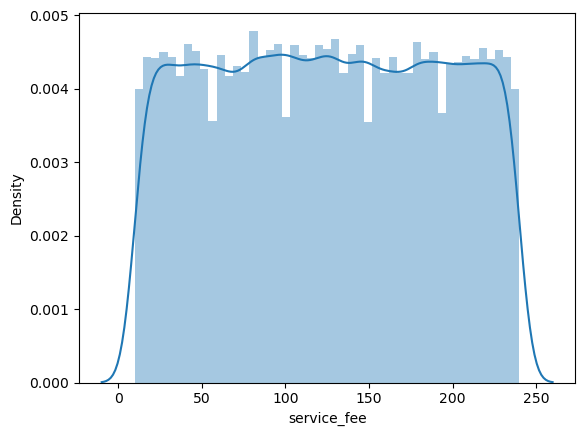

In [25]:
#Checking outlier in service fee
sns.distplot(df["service_fee"])

In [26]:
# NO outliers spotted.
# Most of the hotel has almost same ammount of service fees so we can fill the null with mean values.
df['service_fee'].fillna(df['service_fee'].mean(),inplace=True)

In [27]:
df["price"] = df["price"].str.replace("$","",regex=True)
df["price"] = df["price"].str.replace(",","",regex=True)
df["price"]=df["price"].astype('float')
df["price"].isnull().sum()

247

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

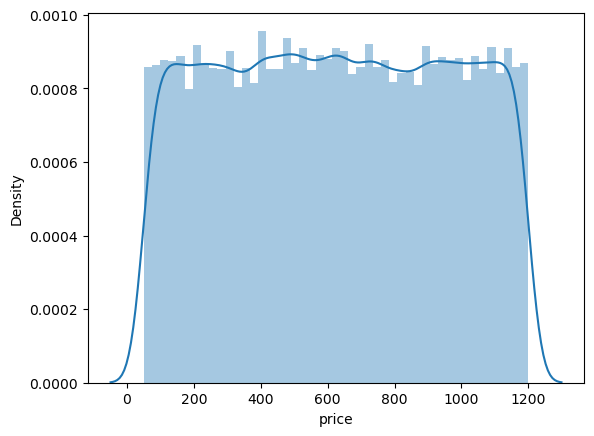

In [28]:
#check for outliers.
sns.distplot(df['price'])

In [29]:
#No outliers spotted
df['price'].fillna(df['price'].mean(),inplace=True)
df.isna().sum()

id                                    0
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room_type                             0
Construction_year                   214
price                                 0
service_fee                           0
minimum_nights                      400
number_of_reviews                     0
last_review                       15832
reviews_per_month                 15818
review_rate_number                    0
calculated_host_listings_count      319
availability_365                      0
house_rules                       51842
dtype: int64

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

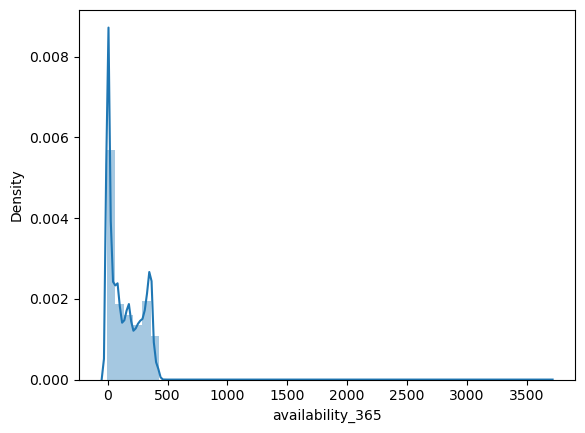

In [30]:
sns.distplot(df['availability_365'])

In [31]:
#There are some negative values in availability 365 columns which is not possible.
#It can be count as a outliers

In [32]:
df.drop(df[df['availability_365']<0].index,inplace=True)

#outliers removed
df.isna().sum()


id                                    0
host_id                               0
host_identity_verified              287
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    104
cancellation_policy                  75
room_type                             0
Construction_year                   210
price                                 0
service_fee                           0
minimum_nights                      394
number_of_reviews                     0
last_review                       15749
reviews_per_month                 15736
review_rate_number                    0
calculated_host_listings_count      316
availability_365                      0
house_rules                       51699
dtype: int64

In [33]:
df["host_identity_verified"].value_counts()

unconfirmed    50721
verified       50619
Name: host_identity_verified, dtype: int64

In [34]:
df["host_identity_verified"].fillna( method ='ffill', inplace = True)

In [35]:
#df.drop(['instant_bookable'],axis=1,inplace=True)

In [36]:
df["cancellation_policy"].fillna( method ='ffill', inplace = True)

In [37]:
df.isna().sum()

id                                    0
host_id                               0
host_identity_verified                0
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    104
cancellation_policy                   0
room_type                             0
Construction_year                   210
price                                 0
service_fee                           0
minimum_nights                      394
number_of_reviews                     0
last_review                       15749
reviews_per_month                 15736
review_rate_number                    0
calculated_host_listings_count      316
availability_365                      0
house_rules                       51699
dtype: int64

In [38]:
df.describe()

,id,host_id,lat,long,Construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.016270e+05,1.016270e+05,101619.000000,101619.000000,101417.000000,101627.000000,101627.000000,101233.000000,101627.000000,85891.000000,101627.000000,101311.000000,101627.000000
mean,2.925831e+07,4.925699e+10,40.728086,-73.949608,2012.489750,625.455100,125.059439,8.130570,27.418432,1.376925,3.279981,7.949236,141.043473
std,1.623726e+07,2.853438e+10,0.055870,0.049540,5.765074,331.265213,66.236076,30.650928,49.457685,1.749022,1.282224,32.315648,135.405489
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,1.523770e+07,2.458836e+10,40.688720,-73.982560,2007.000000,341.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.926971e+07,4.912076e+10,40.722270,-73.954430,2012.000000,625.355580,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.330227e+07,7.398459e+10,40.762760,-73.932320,2017.000000,912.000000,182.000000,5.000000,30.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


From the values here i found that some of the columns contain outliers. from max values and mean values comparison i can see that there is a huge difference between both values. Mean is very much sensitive to outliers 
For example Column minimum nights max values 5645 but mean is 8.13. Like this there are two columns 'availability 365', 'minimum nights'.

In [39]:
df[df['availability_365']>365]

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
5,1004098,45498551794,verified,Michelle,Manhattan,MurrayHill,40.74767,-73.97500,True,flexible,Entirehome/apt,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.000000,1.0,374.0,"Nosmoking,please,andnodrugs."
9,1006307,75527839483,unconfirmed,Carl,Manhattan,UpperWestSide,40.80178,-73.96723,False,strict,Privateroom,2015.0,291.0,58.0,2.0,118.0,2017-07-21,0.99,5.000000,1.0,375.0,NOSMOKINGORPETSANYWHEREONTHEPROPERTY1.Berespec...
25,1015144,48387947293,unconfirmed,Miranda,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,NaN,strict,Entirehome/apt,2006.0,1175.0,235.0,2.0,88.0,2019-06-19,0.73,4.000000,2.0,372.0,NaN
33,1019562,50968902783,unconfirmed,John,Brooklyn,Greenpoint,40.72219,-73.93762,NaN,moderate,Privateroom,2007.0,858.0,172.0,4.0,197.0,2019-06-15,1.65,3.278733,3.0,383.0,LAUNDRY-Laundrycanbedonebythevisitorbefore10pm...
34,1020114,25066620900,verified,Alfred,Manhattan,Harlem,40.82130,-73.95318,NaN,strict,Privateroom,2021.0,545.0,109.0,3.0,273.0,2019-07-01,2.37,3.278733,3.0,411.0,Pleasenosmokingontheproperty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86857,48972457,28355973401,verified,Judah,Manhattan,UpperWestSide,40.79415,-73.97323,True,flexible,Privateroom,2019.0,969.0,194.0,5.0,3.0,2019-06-13,0.08,2.000000,1.0,380.0,1.Youmustbe25yearsofagetorentthishomeandprovid...
86858,48973009,64063830206,unconfirmed,Ephraim,Manhattan,Harlem,40.81589,-73.94648,True,flexible,Entirehome/apt,2003.0,749.0,150.0,4.0,125.0,2019-06-20,3.37,4.000000,4.0,409.0,Weloveourhomeandenjoysharingitwithothers.Wehop...
86874,48981846,35575007933,unconfirmed,Josh,Manhattan,UpperWestSide,40.76986,-73.98673,True,strict,Privateroom,2018.0,643.0,129.0,1.0,1.0,2016-08-09,0.03,5.000000,1.0,383.0,NaN
86875,48982399,83904536534,verified,Chris,Brooklyn,Williamsburg,40.71182,-73.95692,False,moderate,Sharedroom,2012.0,1139.0,228.0,1.0,0.0,NaT,NaN,5.000000,1.0,379.0,NaN


In [40]:
# One year means 365 days so availability in one year can not be more than 365 days.

df.drop(df[df['availability_365']>365].index,inplace=True)

##outlier removed for availability 365 column.

In [41]:
df.describe()

,id,host_id,lat,long,Construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,9.887300e+04,9.887300e+04,98865.000000,98865.000000,98681.000000,98873.000000,98873.000000,98495.000000,98873.000000,83641.000000,98873.000000,98583.000000,98873.000000
mean,2.973875e+07,4.925263e+10,40.727982,-73.949353,2012.492577,625.791739,125.129877,8.158414,27.213870,1.390808,3.287295,8.043314,133.918926
std,1.600125e+07,2.854072e+10,0.055957,0.049848,5.765449,331.296730,66.242896,30.947145,49.178204,1.759482,1.277326,32.654173,129.825622
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,1.615479e+07,2.458365e+10,40.688680,-73.982520,2008.000000,341.000000,68.000000,2.000000,1.000000,0.230000,2.000000,1.000000,2.000000
50%,2.980654e+07,4.911617e+10,40.722160,-73.954310,2012.000000,625.355580,125.000000,3.000000,7.000000,0.760000,3.000000,1.000000,90.000000
75%,4.346161e+07,7.397590e+10,40.762660,-73.931920,2018.000000,913.000000,183.000000,5.000000,30.000000,2.030000,4.000000,2.000000,253.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


In [42]:
df[df['minimum_nights']>1000]


,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
350,1194641,66643346348,verified,Russell,Brooklyn,CrownHeights,40.67473,-73.94494,False,flexible,Entirehome/apt,2003.0,1142.0,228.0,3455.0,0.0,NaT,NaN,1.0,1.0,0.0,NaN
5768,4187002,62526606377,verified,Genevieve,Manhattan,GreenwichVillage,40.73293,-73.99782,False,moderate,Entirehome/apt,2008.0,379.0,76.0,1250.0,2.0,2014-11-09,0.03,2.0,1.0,26.0,NaN
42398,24417751,29378706293,verified,Elena,Brooklyn,Bushwick,40.70235,-73.92892,True,flexible,Privateroom,2013.0,453.0,91.0,5645.0,1.0,2019-06-05,0.88,4.0,1.0,0.0,Nodrugsplease.
42407,24422722,83669529485,unconfirmed,Gk,Brooklyn,BayRidge,40.63189,-74.02322,False,moderate,Entirehome/apt,2022.0,843.0,169.0,2645.0,14.0,2019-06-14,3.59,3.0,1.0,271.0,Nosmoking(indoorsoroutsideontheproperty).Nopet...


In [43]:
df.drop(df[df['minimum_nights']>1000].index,inplace=True)

In [44]:
df.isna().sum()

id                                    0
host_id                               0
host_identity_verified                0
host_name                           400
neighbourhood_group                  28
neighbourhood                        14
lat                                   8
long                                  8
instant_bookable                     89
cancellation_policy                   0
room_type                             0
Construction_year                   192
price                                 0
service_fee                           0
minimum_nights                      378
number_of_reviews                     0
last_review                       15238
reviews_per_month                 15231
review_rate_number                    0
calculated_host_listings_count      290
availability_365                      0
house_rules                       50807
dtype: int64

In [45]:
df['host_name'].fillna("other",inplace=True)


In [46]:
df[df['neighbourhood_group'].isna()]

##percentage of null rows in the column
df['neighbourhood_group'].isna().sum()*100/len(df)

0.02832030262266231

only 0.02% of data of neighbourhood group contain null values so we can drop it as outliers

In [47]:
df.dropna(subset=['neighbourhood_group'],inplace=True)


#Percentage of null values in the neighbourhood column is very very low 

that is why we can remove this rows also

In [48]:
df.dropna(subset=['neighbourhood'],inplace=True)


In [49]:
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].mean(),inplace=True)

In [50]:
#df['Construction year'].fillna('Not_known',inplace=True)

In [51]:
#df['minimum nights'].fillna(df['minimum nights'].mean(),inplace=True)

<AxesSubplot:>

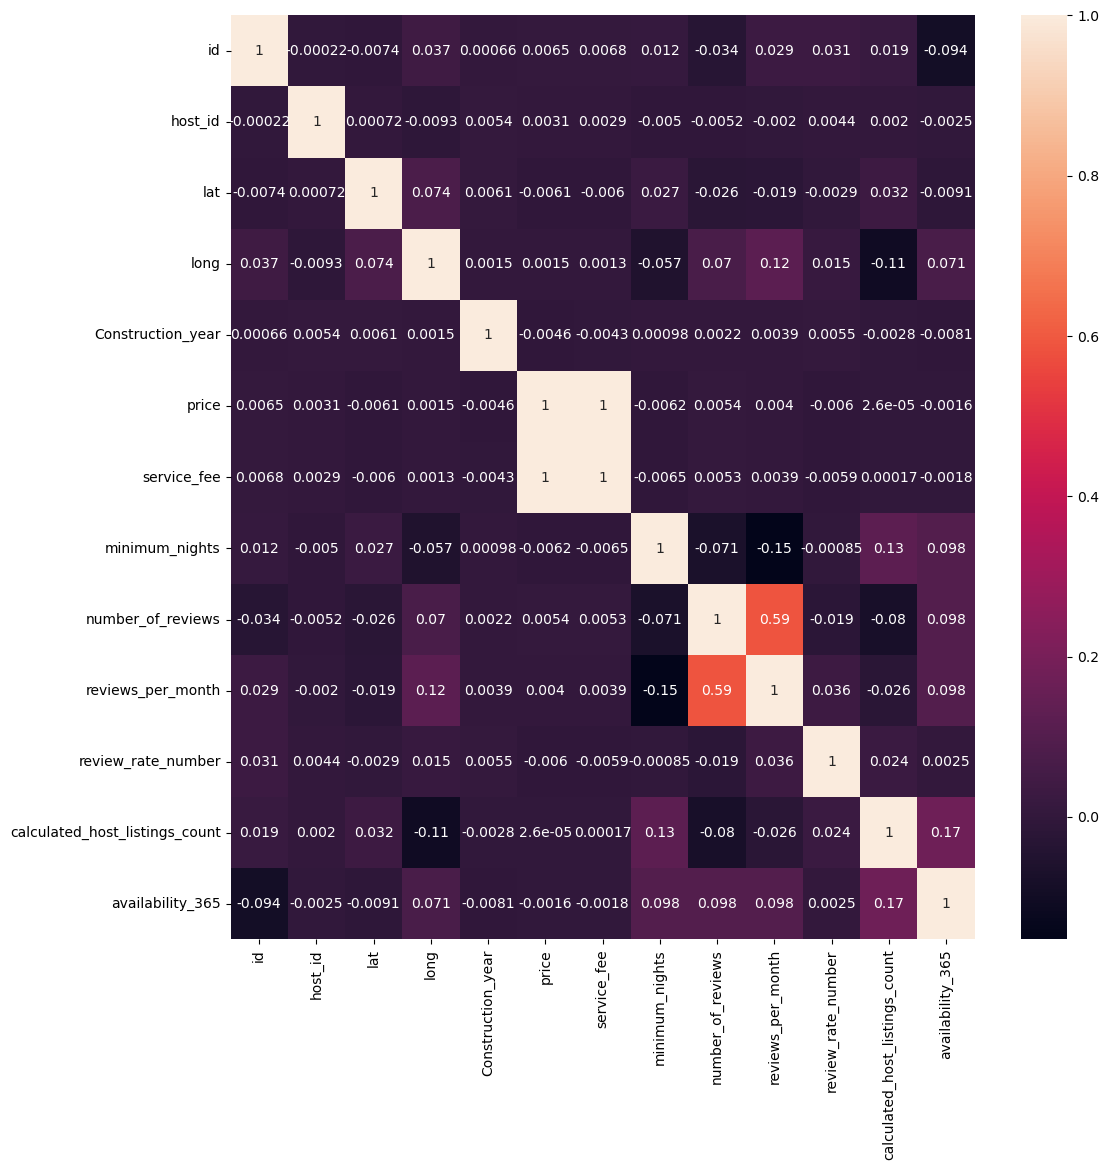

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,)

#Review rate number is not strongly correlated with other columns so we can keep the column as it was before


# Explotery Data Analysis of data.

In [53]:
df['neighbourhood_group'].unique()



array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', 'Bronx',
       'StatenIsland'], dtype=object)

In [54]:
##here we can see the name is same but using different letters we need to fix this 

In [55]:

df['neighbourhood_group'] = df['neighbourhood_group'].str.replace('manhatan', 'Manhattan')
df['neighbourhood_group'] = df['neighbourhood_group'].str.replace('brookln', 'Brooklyn')

In [56]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'StatenIsland'],
      dtype=object)

In [57]:
#check data type and changed it as necessary.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98827 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98827 non-null  int64         
 1   host_id                         98827 non-null  int64         
 2   host_identity_verified          98827 non-null  object        
 3   host_name                       98827 non-null  object        
 4   neighbourhood_group             98827 non-null  object        
 5   neighbourhood                   98827 non-null  object        
 6   lat                             98819 non-null  float64       
 7   long                            98819 non-null  float64       
 8   instant_bookable                98740 non-null  object        
 9   cancellation_policy             98827 non-null  object        
 10  room_type                       98827 non-null  object        
 11  C

DATA TYPES SHULD BE LIKE BELOW:
1. "host_identity_verified" and "instant_bookable" should be a boolean.
2. "construction_year", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "review_rate_number" and "availability_365" should be integer.
3. "price" and "service_fee" should be float.


In [58]:
#converting 'host_identity_verified','instant_bookable'

df.instant_bookable = df.instant_bookable.astype("boolean")
df.host_identity_verified = df.host_identity_verified.replace({"unconfirmed":False,"verified":True})

df.host_identity_verified = df.host_identity_verified.astype("boolean")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98827 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98827 non-null  int64         
 1   host_id                         98827 non-null  int64         
 2   host_identity_verified          98827 non-null  boolean       
 3   host_name                       98827 non-null  object        
 4   neighbourhood_group             98827 non-null  object        
 5   neighbourhood                   98827 non-null  object        
 6   lat                             98819 non-null  float64       
 7   long                            98819 non-null  float64       
 8   instant_bookable                98740 non-null  boolean       
 9   cancellation_policy             98827 non-null  object        
 10  room_type                       98827 non-null  object        
 11  C

In [60]:
df['Construction_year'] = df['Construction_year'].astype("Int64")
df['minimum_nights'] = df['minimum_nights'].astype("Int64")

In [61]:
#makw a copy of wanted dataset.
selected_col=['neighbourhood_group','id','host_id','Construction_year','price','service_fee','minimum_nights','number_of_reviews','review_rate_number','host_identity_verified','instant_bookable','cancellation_policy','room_type','last_review']

In [62]:
sel_df=df[selected_col].copy()

In [63]:
sel_df

,neighbourhood_group,id,host_id,Construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,cancellation_policy,room_type,last_review
0,Brooklyn,1001254,80014485718,2020,966.0,193.000000,10,9.0,4.0,False,False,strict,Privateroom,2021-10-19
1,Manhattan,1002102,52335172823,2007,142.0,28.000000,30,45.0,4.0,True,False,moderate,Entirehome/apt,2022-05-21
2,Manhattan,1002403,78829239556,2005,620.0,124.000000,3,0.0,5.0,True,True,flexible,Privateroom,NaT
3,Brooklyn,1002755,85098326012,2005,368.0,74.000000,30,270.0,4.0,False,True,moderate,Entirehome/apt,2019-07-05
4,Manhattan,1003689,92037596077,2009,204.0,41.000000,10,9.0,3.0,True,False,moderate,Entirehome/apt,2018-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Brooklyn,57365208,77326652202,<NA>,696.0,125.039249,7,12.0,5.0,False,True,moderate,Privateroom,2019-03-27
102054,Brooklyn,57365760,45936254757,<NA>,909.0,125.039249,1,19.0,3.0,True,False,flexible,Privateroom,2017-08-31
102055,Brooklyn,57366313,23801060917,<NA>,387.0,125.039249,2,50.0,4.0,True,True,moderate,Entirehome/apt,2019-06-26
102056,Manhattan,57366865,15593031571,<NA>,848.0,125.039249,2,0.0,1.0,False,True,strict,Privateroom,NaT


In [64]:
sel_df.isna().sum()

neighbourhood_group           0
id                            0
host_id                       0
Construction_year           187
price                         0
service_fee                   0
minimum_nights              376
number_of_reviews             0
review_rate_number            0
host_identity_verified        0
instant_bookable             87
cancellation_policy           0
room_type                     0
last_review               15234
dtype: int64

In [65]:

sel_df['last_review'].isna().sum()*100/len(sel_df)

15.414815789207402

In [66]:
#we can see that last review has lots of null values.lets check the percentage of it.
#all other columns has a small percentage of null values we can remove the null rows.

#15% of the value is null so we will select other column except last review column.

In [67]:
sel_df.drop(['last_review'],axis=1,inplace=True)

In [68]:
sel_df.dropna(inplace=True)

In [69]:
sel_df.isna().sum()

neighbourhood_group       0
id                        0
host_id                   0
Construction_year         0
price                     0
service_fee               0
minimum_nights            0
number_of_reviews         0
review_rate_number        0
host_identity_verified    0
instant_bookable          0
cancellation_policy       0
room_type                 0
dtype: int64

In [70]:
sel_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'StatenIsland'],
      dtype=object)

Total 5 groups which are in New York city.

In [71]:
sel_df.describe()

,id,host_id,Construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number
count,9.820200e+04,9.820200e+04,98202.000000,98202.000000,98202.000000,98202.000000,98202.000000,98202.000000
mean,2.982527e+07,4.925442e+10,2012.492190,625.852909,125.146289,8.024287,27.081750,3.288167
std,1.596107e+07,2.854497e+10,5.764506,331.304005,66.244915,20.672716,48.928189,1.277184
min,1.001254e+06,1.236005e+08,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000
25%,1.625655e+07,2.457509e+10,2008.000000,341.000000,68.000000,2.000000,1.000000,2.000000
50%,2.990292e+07,4.911833e+10,2012.000000,625.355580,125.000000,3.000000,7.000000,3.000000
75%,4.351062e+07,7.399621e+10,2018.000000,913.000000,183.000000,5.000000,30.000000,4.000000
max,5.736742e+07,9.876313e+10,2022.000000,1200.000000,240.000000,1000.000000,1024.000000,5.000000


At first sight, we can see some inconsistencies in the minimum_nights column. Negative values are impossible and great values, such as 1000 are highly unlikely. Let's see what are the most popular values for this column.



In [72]:
sel_df['minimum_nights'].value_counts(normalize=True).mul(100).round(1).astype(str).head(10) + "%"

1     24.9%
2     23.2%
3     15.7%
30    11.5%
4      6.5%
5      5.9%
7      3.9%
6      1.5%
14     1.0%
10     0.9%
Name: minimum_nights, dtype: object

The minimum_nights that represent more than 1% of the data are between 1 and 30. Let's exclude the values outside this range by replacing them with NaNs.



In [73]:
sel_df.loc[sel_df['minimum_nights'] < 0, "minimum_nights"] = pd.NA
sel_df.loc[sel_df['minimum_nights'] > 30, "minimum_nights"] = pd.NA

Let's study the offer of accommodations according to the different room types:
Private room,
Entire home/apt,
Shared room,
Hotel room,



In [74]:
room_types = sel_df['room_type'].value_counts(normalize=True).mul(100).round(1)
room_types

Entirehome/apt    52.2
Privateroom       45.5
Sharedroom         2.2
Hotelroom          0.1
Name: room_type, dtype: float64

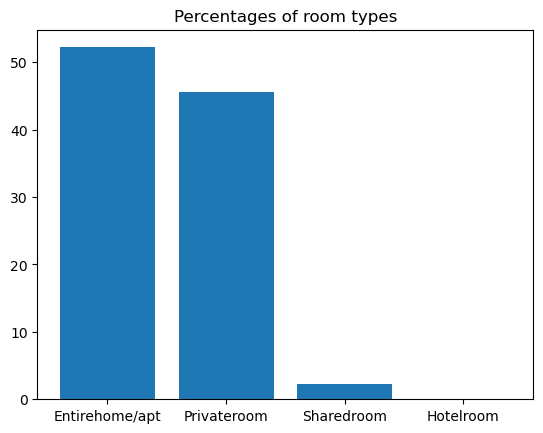

In [75]:
plt.title("Percentages of room types")
plt.bar(room_types.index, room_types);

The majority of the accommodations belong to the category "Entire home/apt", closely followed by "Private room". There is a very low offer of "Shared room" and "Hotel room".

Let's see what happens with the prices.

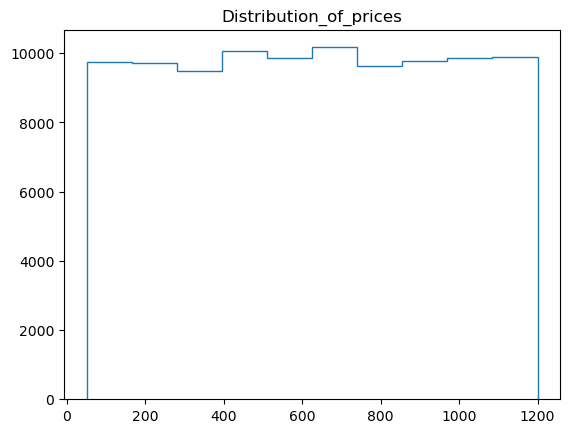

In [76]:
plt.title("Distribution_of_prices")
plt.hist(sel_df.price,bins=10,histtype="step");

<AxesSubplot:xlabel='neighbourhood_group'>

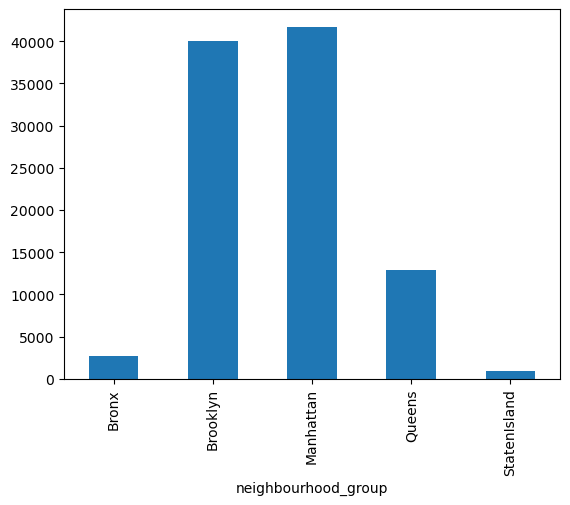

In [77]:
#which city got highest number of customers
sel_df[['neighbourhood_group']].groupby('neighbourhood_group').value_counts(ascending=False).plot(kind='bar')

There seems to be some uniformity in the distribution of the prices, which are in the range 50-1200 dollars.



Now, let's see what are the most common and uncommon cancellation policies.



In [78]:
cancellations = sel_df['cancellation_policy'].value_counts()
cancellations

moderate    32854
strict      32700
flexible    32648
Name: cancellation_policy, dtype: int64

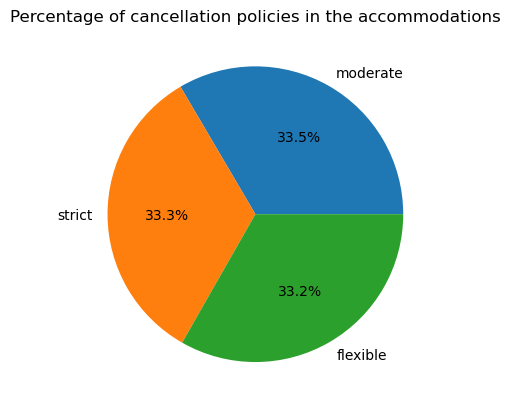

In [79]:
plt.title("Percentage of cancellation policies in the accommodations")
plt.pie(cancellations, autopct='%1.1f%%', labels = cancellations.index);


The cancellation policies are almost evenly distributed between the 3 categories

Let's examine if there is a correlation between the price and the service fee.

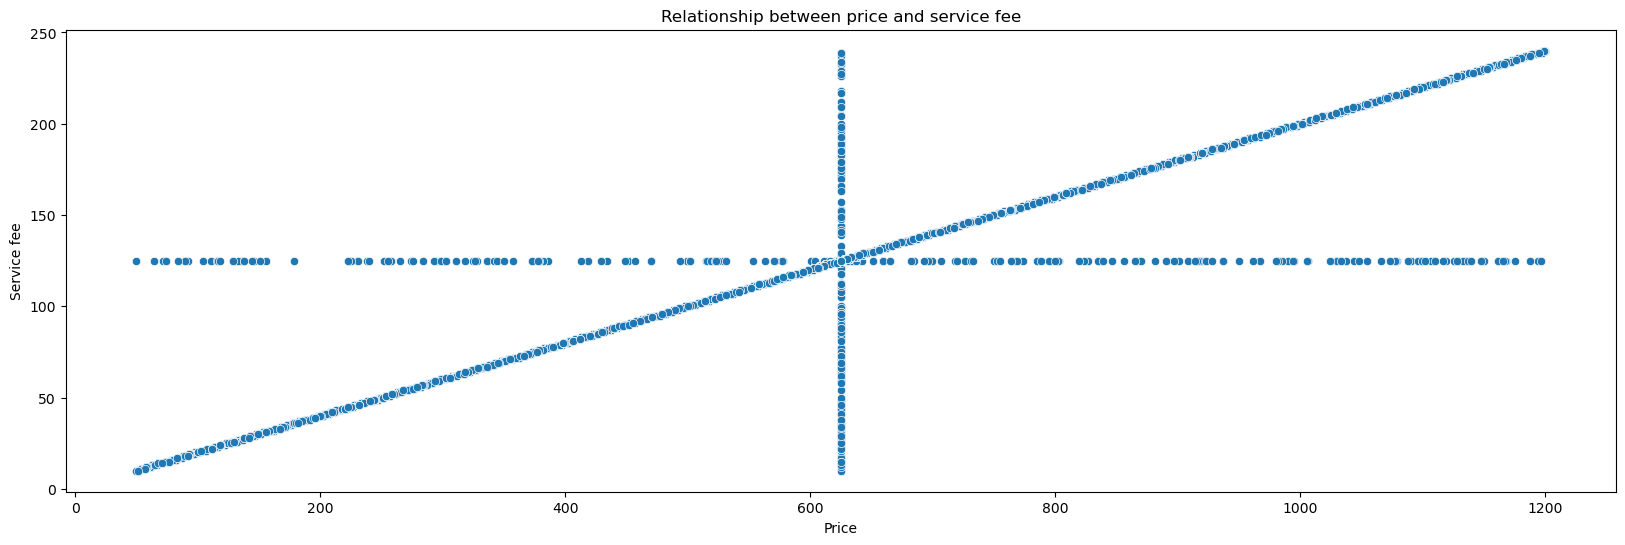

In [80]:
plt.figure(figsize=(20, 6))
plt.title("Relationship between price and service fee")
plt.xlabel("Price")
plt.ylabel("Service fee")
sns.scatterplot(x=sel_df.price, y=sel_df['service_fee']);

positive correlation between service fee and price.
the more price means more service fee for the customer.

Finally, let's see the number of accommodations, according to their year of construction.

<AxesSubplot:xlabel='Construction_year', ylabel='minimum_nights'>

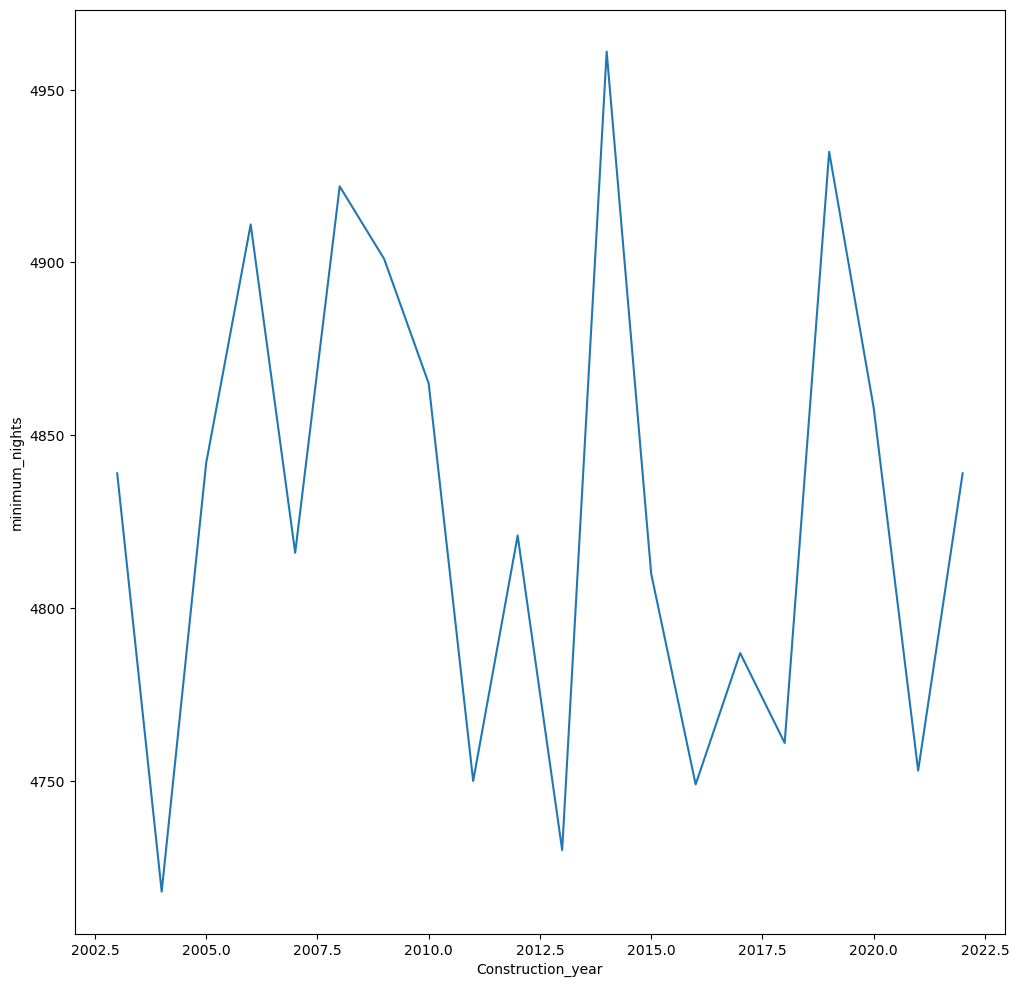

In [81]:
plt.figure(figsize=(12,12))
acc_by_year=sel_df[['Construction_year','minimum_nights']].groupby('Construction_year',as_index=False).count()
sns.lineplot(x='Construction_year',y='minimum_nights',data=acc_by_year,)

#almost equally distributed all the year still,
heighest number of accomodation built in 2014 and lowest number in 2004

In [82]:
#working on custome review:
sel_df


,neighbourhood_group,id,host_id,Construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,cancellation_policy,room_type
0,Brooklyn,1001254,80014485718,2020,966.00000,193.000000,10,9.0,4.0,False,False,strict,Privateroom
1,Manhattan,1002102,52335172823,2007,142.00000,28.000000,30,45.0,4.0,True,False,moderate,Entirehome/apt
2,Manhattan,1002403,78829239556,2005,620.00000,124.000000,3,0.0,5.0,True,True,flexible,Privateroom
3,Brooklyn,1002755,85098326012,2005,368.00000,74.000000,30,270.0,4.0,False,True,moderate,Entirehome/apt
4,Manhattan,1003689,92037596077,2009,204.00000,41.000000,10,9.0,3.0,True,False,moderate,Entirehome/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102047,Brooklyn,57361894,92852058426,2005,625.35558,125.039249,7,15.0,4.0,False,False,moderate,Privateroom
102048,Manhattan,57362446,95572379802,2010,625.35558,125.039249,3,38.0,3.0,True,True,flexible,Entirehome/apt
102049,Manhattan,57362999,80154173698,2020,625.35558,125.039249,1,81.0,2.0,True,True,strict,Entirehome/apt
102050,Brooklyn,57363551,11145329848,2016,625.35558,125.039249,2,104.0,5.0,False,False,moderate,Entirehome/apt


Text(0.5, 1.0, 'Percentage of Review Rate Numbers given by customers')

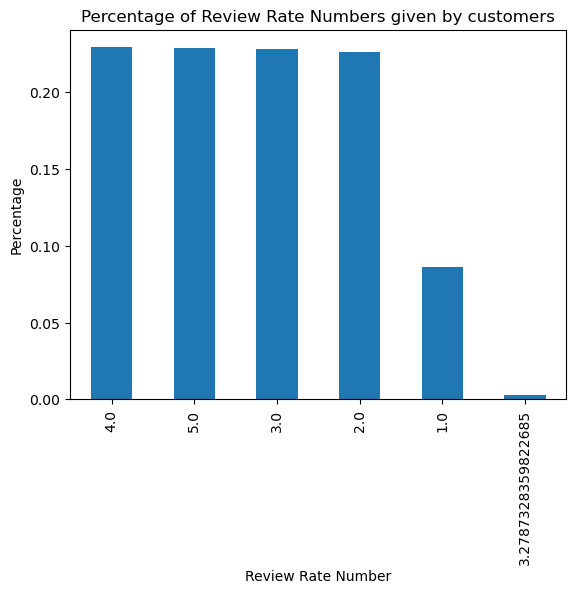

In [83]:
#distribution of review number:
sel_df['review_rate_number'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel("Percentage")
plt.xlabel("Review Rate Number")
plt.title("Percentage of Review Rate Numbers given by customers")


In [84]:
#almost 10 percent people gave lowest review but other 90 percents people review are equally distributed from review 2 to 5

In [85]:
#which city got the highest rated accommodations?

acc_by_city=sel_df[['neighbourhood_group','review_rate_number']]

<AxesSubplot:xlabel='neighbourhood_group'>

<Figure size 1400x1400 with 0 Axes>

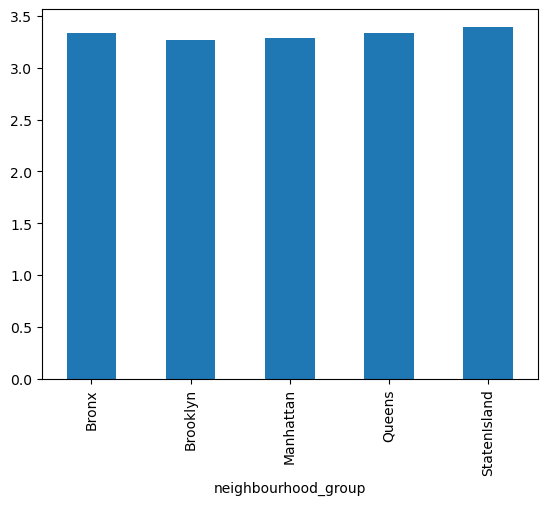

In [86]:
plt.figure(figsize=(14,14))

acc_by_city.groupby('neighbourhood_group').mean().plot(kind='bar',legend=False)

In [87]:
#at a low margin Staten Island gives high ratings and Brooklyn customers gaves low reviews

In [88]:
sel_df.loc[sel_df['price']<=500, 'price_group'] = 'Low'
sel_df.loc[sel_df['price'].between(501,1000), 'price_group'] = 'Medium'
sel_df.loc[sel_df['price']>1000, 'price_group'] = 'High'


<AxesSubplot:>

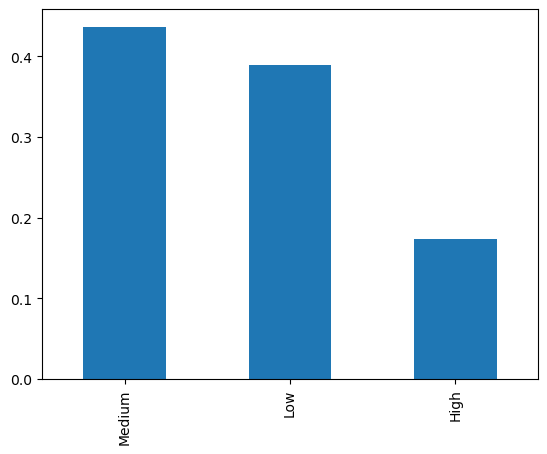

In [89]:
sel_df['price_group'].value_counts(normalize=True).plot(kind='bar')

In [90]:
#almost 50% customer prefer medium range accomodation and high is is the lowest as expected

Text(0, 0.5, 'Average review rate number')

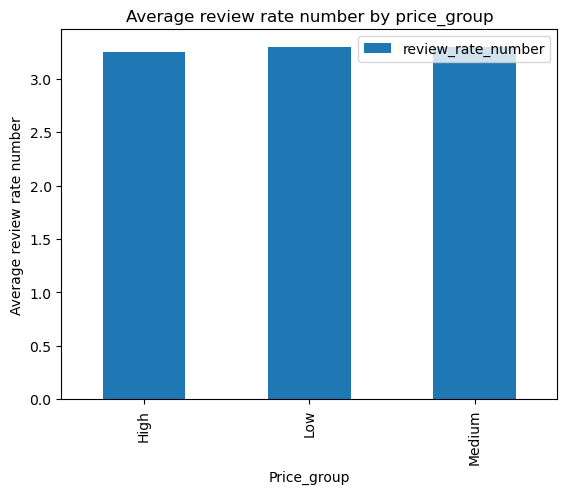

In [91]:
sel_df[['review_rate_number','price_group']].groupby('price_group').mean().plot(kind='bar')
plt.title("Average review rate number by price_group")
plt.xlabel("Price_group")
plt.ylabel("Average review rate number")


In [92]:
#seems like price range have no effects on review as all the group gave same reviews average.

<AxesSubplot:xlabel='instant_bookable'>

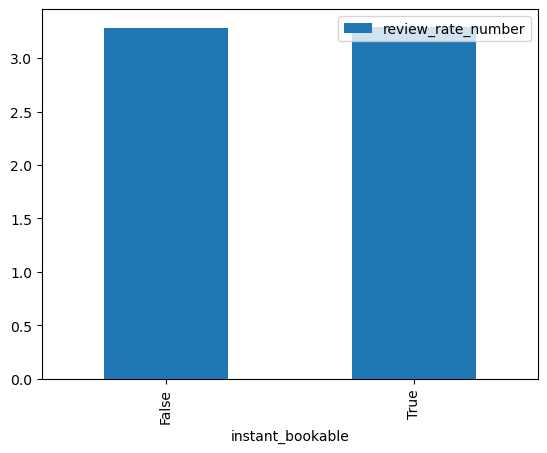

In [93]:
sel_df[['instant_bookable','review_rate_number']].groupby('instant_bookable',).mean().plot(kind='bar')

In [94]:
#Virtually instant bookable option does not effects ratings of customers

In [95]:
#what type of room customer preferred and what is the ratings for that?

<AxesSubplot:>

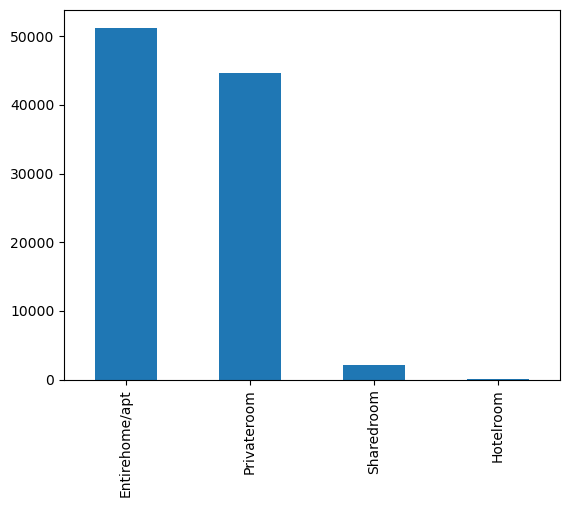

In [96]:
sel_df['room_type'].value_counts().plot(kind='bar')

demand of apt and private room are high for the customers.

#now lets see what is ratings for that

In [97]:
sel_df[['room_type','review_rate_number']].groupby('room_type').mean().sort_values(by='review_rate_number',ascending=False)

,review_rate_number
room_type,
Hotelroom,3.548673
Sharedroom,3.313493
Privateroom,3.290936
Entirehome/apt,3.284117


Text(0, 0.5, 'Average review rate number')

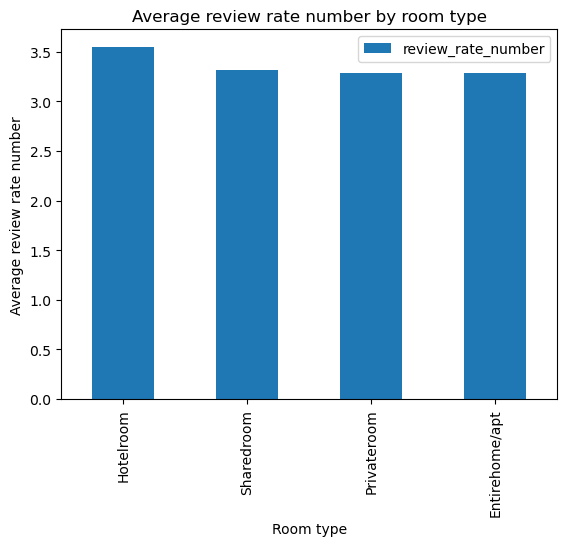

In [98]:
sel_df[['room_type','review_rate_number']].groupby('room_type').mean().sort_values(by='review_rate_number',ascending=False).plot(kind='bar')
plt.title("Average review rate number by room type")
plt.xlabel("Room type")
plt.ylabel("Average review rate number")

In [99]:
#as most of the people use apt and private room so rating average is less for this two as expected

In [100]:
sel_df

,neighbourhood_group,id,host_id,Construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,cancellation_policy,room_type,price_group
0,Brooklyn,1001254,80014485718,2020,966.00000,193.000000,10,9.0,4.0,False,False,strict,Privateroom,Medium
1,Manhattan,1002102,52335172823,2007,142.00000,28.000000,30,45.0,4.0,True,False,moderate,Entirehome/apt,Low
2,Manhattan,1002403,78829239556,2005,620.00000,124.000000,3,0.0,5.0,True,True,flexible,Privateroom,Medium
3,Brooklyn,1002755,85098326012,2005,368.00000,74.000000,30,270.0,4.0,False,True,moderate,Entirehome/apt,Low
4,Manhattan,1003689,92037596077,2009,204.00000,41.000000,10,9.0,3.0,True,False,moderate,Entirehome/apt,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102047,Brooklyn,57361894,92852058426,2005,625.35558,125.039249,7,15.0,4.0,False,False,moderate,Privateroom,Medium
102048,Manhattan,57362446,95572379802,2010,625.35558,125.039249,3,38.0,3.0,True,True,flexible,Entirehome/apt,Medium
102049,Manhattan,57362999,80154173698,2020,625.35558,125.039249,1,81.0,2.0,True,True,strict,Entirehome/apt,Medium
102050,Brooklyn,57363551,11145329848,2016,625.35558,125.039249,2,104.0,5.0,False,False,moderate,Entirehome/apt,Medium


In [101]:
pol_room=sel_df[['room_type','cancellation_policy']].groupby('room_type',as_index=False).value_counts()

In [102]:
pol_room

,room_type,cancellation_policy,count
0,Entirehome/apt,flexible,17137
1,Entirehome/apt,moderate,17080
2,Entirehome/apt,strict,17056
3,Hotelroom,flexible,42
4,Hotelroom,moderate,37
5,Hotelroom,strict,34
6,Privateroom,moderate,15025
7,Privateroom,strict,14892
8,Privateroom,flexible,14746
9,Sharedroom,flexible,723


<AxesSubplot:xlabel='room_type', ylabel='count'>

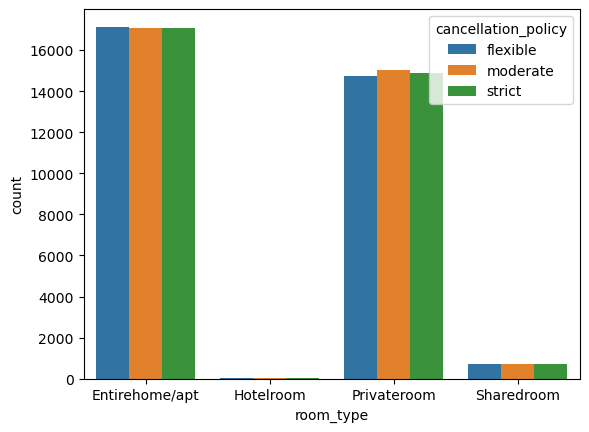

In [103]:
sns.barplot(x='room_type',y='count',hue='cancellation_policy',data=pol_room)

In [104]:
#policy type does not effect the choice of customer. most of the customer rent apt and or private room.

## Inferences and Conclusion

1. mejority of people wants to rent "Entire home/apt"
2. three types of cancellation policies have almost same percentage of consumers. Evenly distributed.
3. Service fee positively co- related with price. 
4. highest number of construction for accomodation done in 2014 and lowest o=in 2004
5. distribution of price is uniform: from 60 to 1200 dollars.
6. less people gave 1 ratings but for 2-5 ratings number of customers almost same for each rating catagory.
7.  Staten Island got heighest ratings and Brooklyn got the lowest ratings 
8. price range did not effect the ratings .'
9. Medium range accomodations have the highest preference for rent followed by low and high range.
10. instant biikable options does not have strong co-relation with ratings.
11. Hotel room have less customers so it got the highest ratings as expected. also hotel room price is higher than other catagories.




##Future work

1. Need to work on the data based on neighbourhood group.
2. More review year should be added to the data to actually know how customers ratings are changing in terms of other catagories.
3. Need to merge other city data to compare which city is doing good business.
4. More works should be done considering the number of reviews in the data set.

In [105]:
sel_df.columns

Index(['neighbourhood_group', 'id', 'host_id', 'Construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews',
       'review_rate_number', 'host_identity_verified', 'instant_bookable',
       'cancellation_policy', 'room_type', 'price_group'],
      dtype='object')

In [106]:
new_df=sel_df.drop('price_group',axis=1)

In [107]:
new_df.drop(['id','host_id','Construction_year'],axis=1,inplace=True)


In [108]:
X=new_df.drop('price',axis=1)
y=new_df['price']

In [109]:
X

,neighbourhood_group,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,cancellation_policy,room_type
0,Brooklyn,193.000000,10,9.0,4.0,False,False,strict,Privateroom
1,Manhattan,28.000000,30,45.0,4.0,True,False,moderate,Entirehome/apt
2,Manhattan,124.000000,3,0.0,5.0,True,True,flexible,Privateroom
3,Brooklyn,74.000000,30,270.0,4.0,False,True,moderate,Entirehome/apt
4,Manhattan,41.000000,10,9.0,3.0,True,False,moderate,Entirehome/apt
...,...,...,...,...,...,...,...,...,...
102047,Brooklyn,125.039249,7,15.0,4.0,False,False,moderate,Privateroom
102048,Manhattan,125.039249,3,38.0,3.0,True,True,flexible,Entirehome/apt
102049,Manhattan,125.039249,1,81.0,2.0,True,True,strict,Entirehome/apt
102050,Brooklyn,125.039249,2,104.0,5.0,False,False,moderate,Entirehome/apt


In [110]:
X['minimum_nights'].fillna(value=int(X['minimum_nights'].mean()), inplace=True)

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor



X = pd.get_dummies(X, columns=["neighbourhood_group", "host_identity_verified", "instant_bookable", "cancellation_policy", "room_type"])

In [112]:


X.isna().sum()

service_fee                         0
minimum_nights                      0
number_of_reviews                   0
review_rate_number                  0
neighbourhood_group_Bronx           0
neighbourhood_group_Brooklyn        0
neighbourhood_group_Manhattan       0
neighbourhood_group_Queens          0
neighbourhood_group_StatenIsland    0
host_identity_verified_False        0
host_identity_verified_True         0
instant_bookable_False              0
instant_bookable_True               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
room_type_Entirehome/apt            0
room_type_Hotelroom                 0
room_type_Privateroom               0
room_type_Sharedroom                0
dtype: int64

In [113]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a machine learning model (e.g., Random Forest)
model = RandomForestRegressor()
clf = DecisionTreeRegressor()


In [114]:
models=(model,clf)
for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test) ## Make predictions
    mae = mean_absolute_error(y_test, y_pred)  # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = (mse ** 0.5)
    r2 = r2_score(y_test, y_pred)


    print(f"Mean Absolute Error for {i}model : {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared (R2) Score: {r2}")
    

Mean Absolute Error for RandomForestRegressor()model : 3.198464144622191
Mean Squared Error: 545.940406277879
Root Mean Squared Error: 23.365367668365053
R-squared (R2) Score: 0.9950395272921922
Mean Absolute Error for DecisionTreeRegressor()model : 3.7222878705590885
Mean Squared Error: 1171.1354505330555
Root Mean Squared Error: 34.2218563279822
R-squared (R2) Score: 0.9893589384982096
